# Heart Disease Classification

## 1. Importing the dataset and libraries

We import the necessary libraries, seaborn for better data visualization, and we import the dataset to a Pandas DataFrame

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import utils
import seaborn as sns

In [2]:
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 '.vscode',
 'dataset',
 'debug.log',
 'environment.yml',
 'heart_disease.ipynb',
 'images',
 'requirements.txt',
 'utils.py',
 '__pycache__']

In [3]:
CSV_PATH = 'dataset/heart.csv'
CSV_PATH = os.path.join(os.getcwd(), CSV_PATH)
heart_df = pd.read_csv(CSV_PATH)

In [4]:
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 2. Dataset parameters

1.  **Age**
2.	**Sex** (0 – female and 1 – male)
3.	**cp**: chest pain type

    - (1): typical angina
    - (2): atypical angina
    - (3): non-anginal pain
    - (4): asymptomatic
    
4.	**trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5.	**chol**: serum cholesterol in mg/dl
6.	 **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.	**restecg**: resting electrocardiographic results

    - (0): normal
    - (1): having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - (2): showing probable or definite left ventricular hypertrophy by Estes' criteria
    
8.	**thalach**: maximum heart rate achieved
9.	**exang**: exercise induced angina (1 = yes; 0 = no)
10.	**oldpeak** = ST depression induced by exercise relative to rest
11.	**slope**: the slope of the peak exercise ST segment

    - (1): upsloping
    - (2): flat
    - (3): downsloping
    
12.	**ca**: number of major vessels (0-3) colored by flourosopy
13.	**thal**: 3 = normal; 6 = fixed defect; 7 = reversable defect
14.	**target**: diagnosis of heart disease (angiographic disease status)

    - (0): < 50% diameter narrowing
    - (1): > 50% diameter narrowing (Predicted value)
    


In [5]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## 3. Exploratory Data analysis and Data Preprocessing

We first create a countplot of male and female patients having the heart disease

Saving figure count_sex


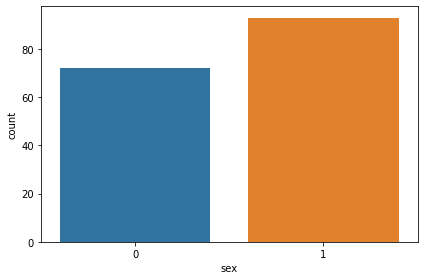

In [6]:
sns.countplot(x=heart_df['sex'][heart_df.target == 1]);
utils.save_fig("count_sex")

We then create a scatter plot between Age (`age`) and maximum heart rate (`thalach`)

Saving figure scatter_age_thalach


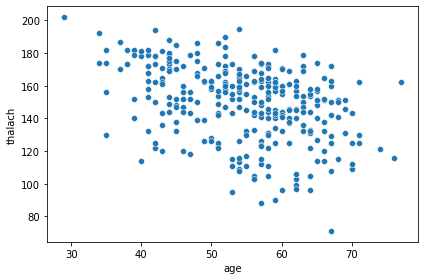

In [7]:
sns.scatterplot(data=heart_df, x='age', y='thalach');
utils.save_fig("scatter_age_thalach")

Now for the in-depth data analysis part, we first create a box plot to see the distribution of data points for each feature.

<AxesSubplot:xlabel='variable', ylabel='value'>

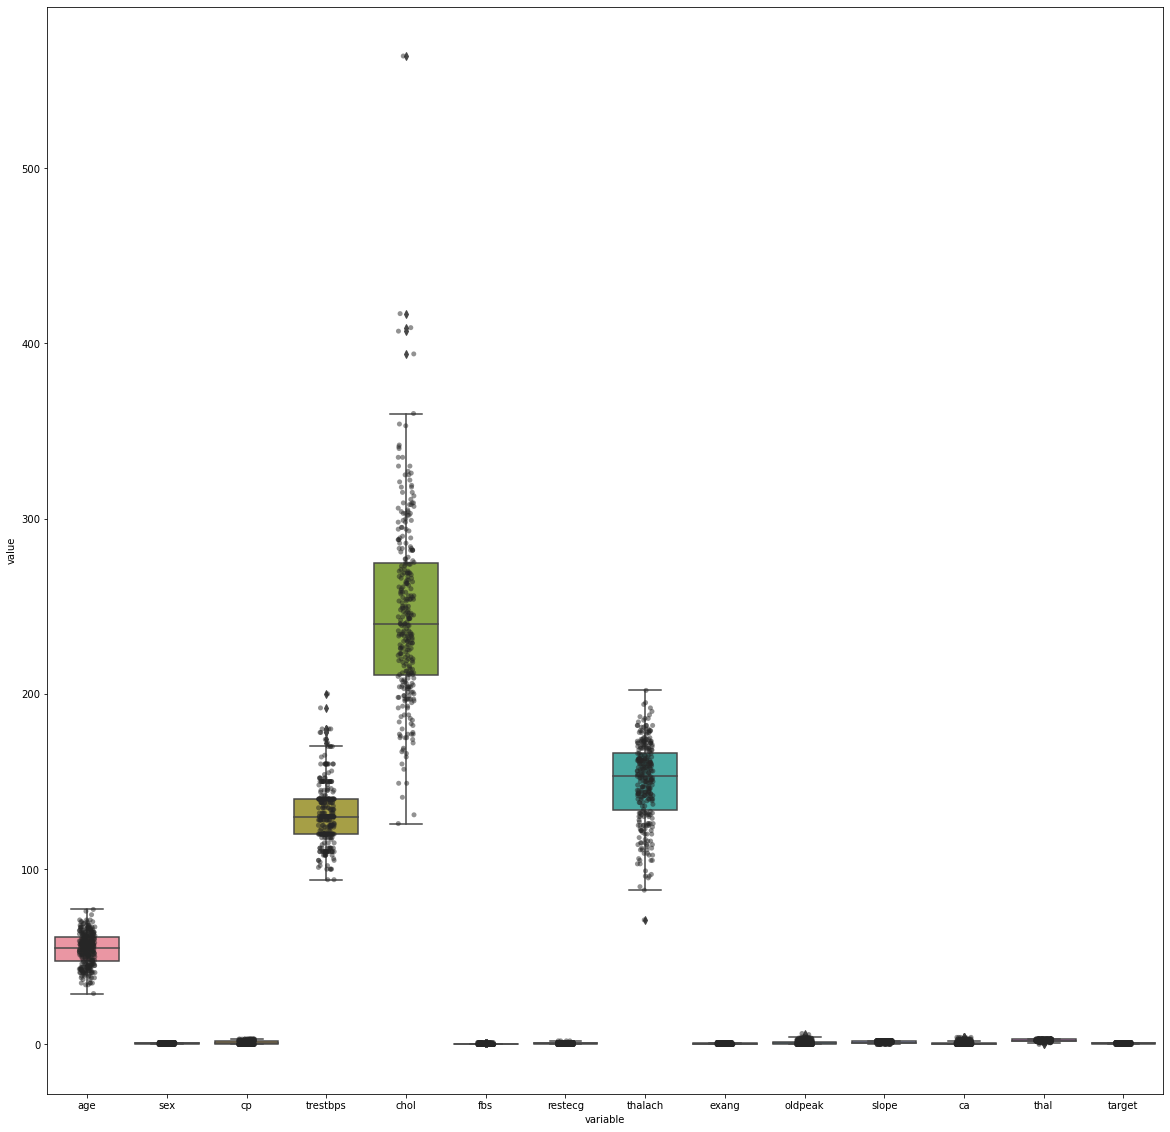

In [8]:
_, ax = plt.subplots(figsize=(20, 20))
sns.boxplot(x="variable", y="value", data=pd.melt(heart_df), ax=ax)
sns.stripplot(x="variable", y="value", data=pd.melt(heart_df), ax=ax, color='.15', alpha=.5)

To understand it better, we plot the boxplots for each feature separately, first for the categorical variables, then for the continuous variables.
The categorical variables are plotted as scatter plot (strip plot is similar to scatter plot but using a smaller number of data points) to show the relative distribution of data points around each categories for the categorical features.

For example, the strip plot for feature "cp" shows the distribution of the data points in each of the 4 categories of "cp" both for positive ("target" = 1) and negative ("target" = 1) samples.

In [9]:
n_cols = len(heart_df.columns) - 1
print(f'Number of feature columns: {n_cols}')

Number of feature columns: 13


In [10]:
# columns that are categorical

cat_cols = ['sex', 
            'cp', 
            'fbs', 
            'restecg', 
            'exang', 
            'slope', 
            'ca', 
            'thal']
# columns that are continuous valued (numeric)
num_cols = list(set(heart_df.columns[:-1]) - set(cat_cols))

Saving figure stripplot_cat


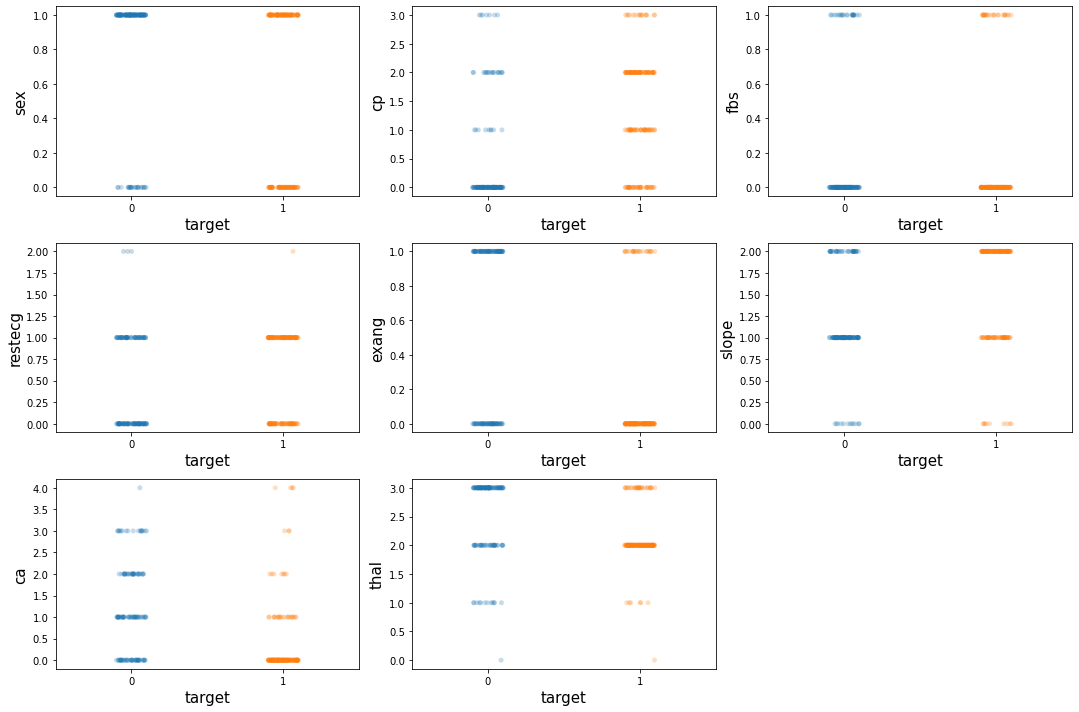

In [11]:
# strip plot for seeing the relative distribution of data points around each category for the categorical features

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        idx = i*ax.shape[1] + j
        if not (idx > len(cat_cols)-1):
            col = cat_cols[idx]
            ax[i][j].xaxis.get_label().set_fontsize(15)
            ax[i][j].yaxis.get_label().set_fontsize(15)
            sns.stripplot(x='target', y=col, data=heart_df, ax=ax[i][j],alpha=0.25)
fig.delaxes(ax[2][2])

utils.save_fig("stripplot_cat")

We also plot the count plots for each category to understand their relative frequencies.

Saving figure countplot


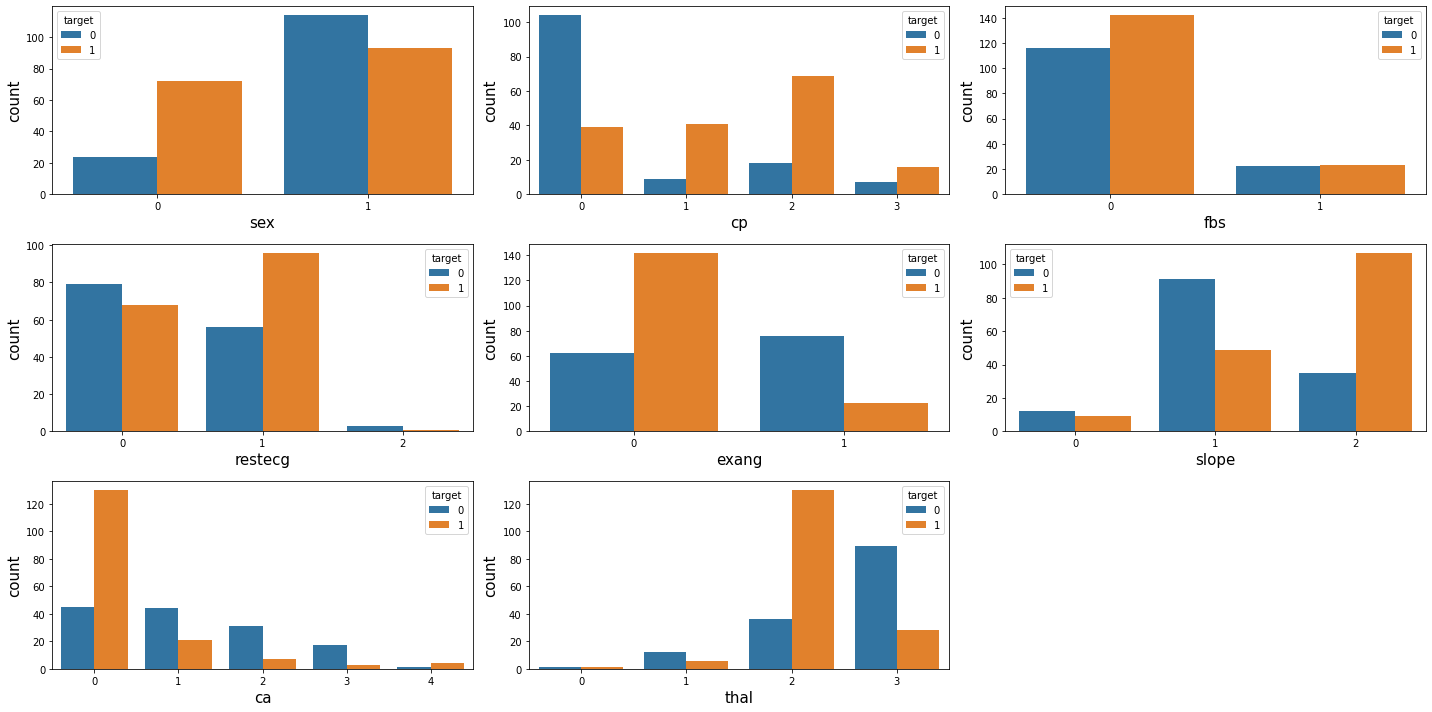

In [12]:
# countplot

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        idx = i*ax.shape[1] + j
        if not (idx > len(cat_cols)-1):
            col = cat_cols[idx]
            ax[i][j].xaxis.get_label().set_fontsize(15)
            ax[i][j].yaxis.get_label().set_fontsize(15)
            sns.countplot(hue='target', x=col, data=heart_df, ax=ax[i][j])
fig.delaxes(ax[2][2])

utils.save_fig('countplot')

We then use box plots for continuous variables to show their overall distribution between the Inter-Quartile range for each feature.
The two endpoints of each boxplot that stretch on both sides beyond the quartile boxes denote the minimum and maximum `whiz`, which correspond to `(Q1 - 1.5 * IQR)` and `(Q3 + 1.5 * IQR)`, where Q1 and Q3 are the 25th and 75th `percentile` respectively, and `IQR` is the Inter-Quartile range.
Q1 being 25th percentile signifies that 25% of all values for that feature in the distribution lie below Q1.
Similarly, Q3 signifies that 75% of values in the distribution lie below Q3.
Q2 is the line in between Q1 and Q3 which signifies the `median`, of the 50th percentile, half of the values in the distribution lie below that line.

The upper and lower bounds of whiz denote how extreme the values for the features are. If some value is far apart from even these boundaries, then it is clearly an outlier.
This is how we can detect any form of outlier or anomalous value for these continuous features in this visualization.

As we can see, there are some outlier values in "chol" feature with values greater than 500.

Saving figure boxplot


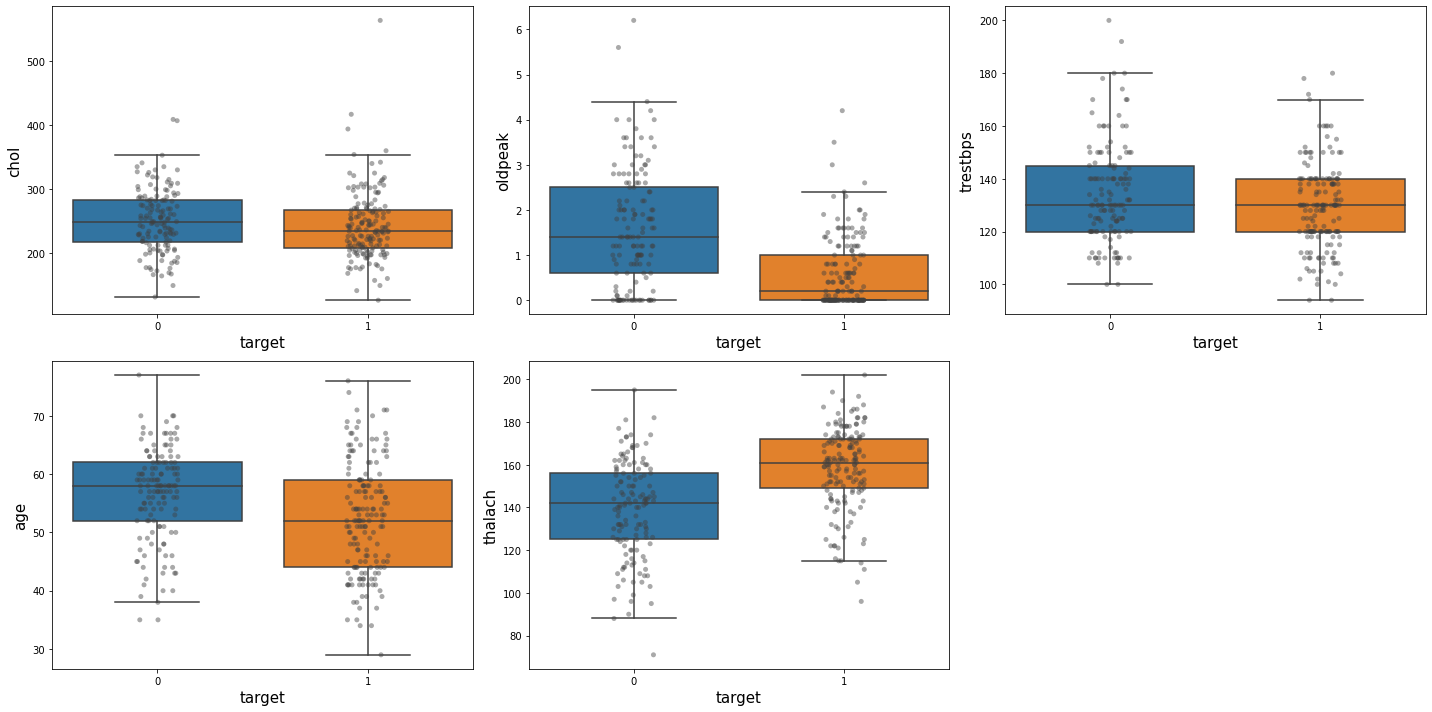

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        idx = i*ax.shape[1] + j
        if not (idx > len(num_cols)-1):
            col = num_cols[idx]
            ax[i][j].xaxis.get_label().set_fontsize(15)
            ax[i][j].yaxis.get_label().set_fontsize(15)
            sns.stripplot(x='target', y=col, data=heart_df, ax=ax[i][j], color='.25', alpha=0.45)
            sns.boxplot(x='target', y=col, data=heart_df, ax=ax[i][j], showfliers=False)
fig.delaxes(ax[1][2])

utils.save_fig("boxplot")

Now, we need to distinguish these outliers by correctly identifying the corresponding rows that have these anomalous values.
For this, we create a normal distribution for each continuous feature, taking its mean and standard deviation.

We then take a randomized sample of the same size as out dataset and plot our original feature values (X axis) against these feature values from the Normal distribution (Y axis).

If an outlier is there, it will have some extreme X-value, which will make it further apart in the scatter plot.

We then compute the `Z-score` for each feature value of each data point, which calculates how many standard deviations away the feature value is from its mean. We then put some threshold, saying that we only accept points which are some specific standard deviation away from the mean (`3.35` in this case), and all the others are outliers.

We assume that each feature is approximately Normally distributed, hence this scatterplot allows us to visualize a superposition of the scatter of the actual feature values on the ideal Normal distribution of the feature and then churn out the values which lie further apart from the 3.35 sigma.

In [14]:
# columns that are categorical

cat_cols = ['sex', 
            'cp', 
            'fbs', 
            'restecg', 
            'exang', 
            'slope', 
            'ca', 
            'thal']

            age       sex        cp  trestbps      chol       fbs   restecg  \
count 303.00000 303.00000 303.00000 303.00000 303.00000 303.00000 303.00000   
mean   54.36634   0.68317   0.96700 131.62376 246.26403   0.14851   0.52805   
std     9.08210   0.46601   1.03205  17.53814  51.83075   0.35620   0.52586   
min    29.00000   0.00000   0.00000  94.00000 126.00000   0.00000   0.00000   
25%    47.50000   0.00000   0.00000 120.00000 211.00000   0.00000   0.00000   
50%    55.00000   1.00000   1.00000 130.00000 240.00000   0.00000   1.00000   
75%    61.00000   1.00000   2.00000 140.00000 274.50000   0.00000   1.00000   
max    77.00000   1.00000   3.00000 200.00000 564.00000   1.00000   2.00000   

        thalach     exang   oldpeak     slope        ca      thal    target  
count 303.00000 303.00000 303.00000 303.00000 303.00000 303.00000 303.00000  
mean  149.64686   0.32673   1.03960   1.39934   0.72937   2.31353   0.54455  
std    22.90516   0.46979   1.16108   0.61623   1.0226

(297, 14)

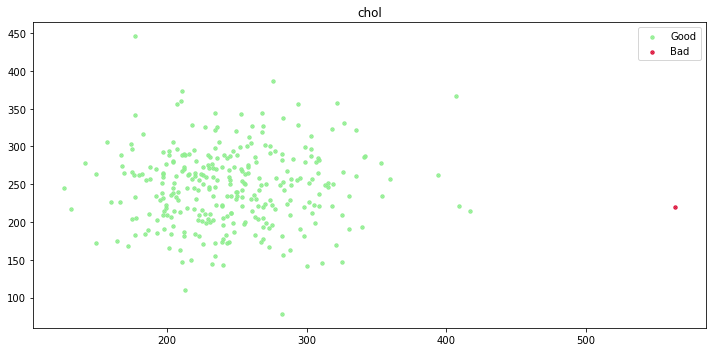

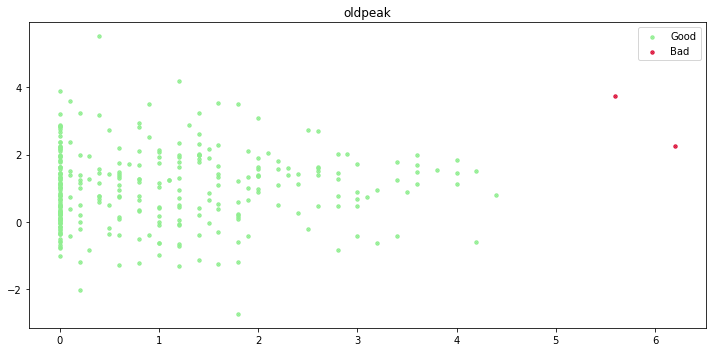

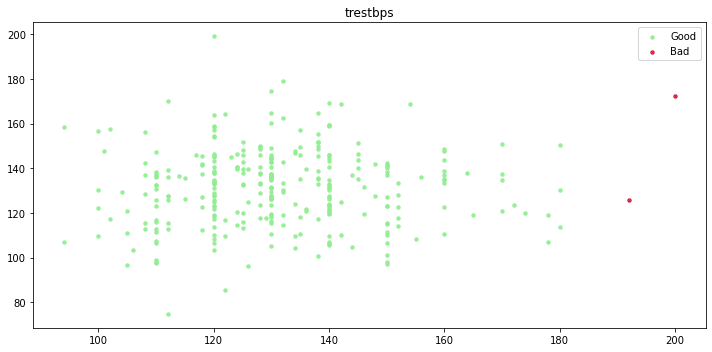

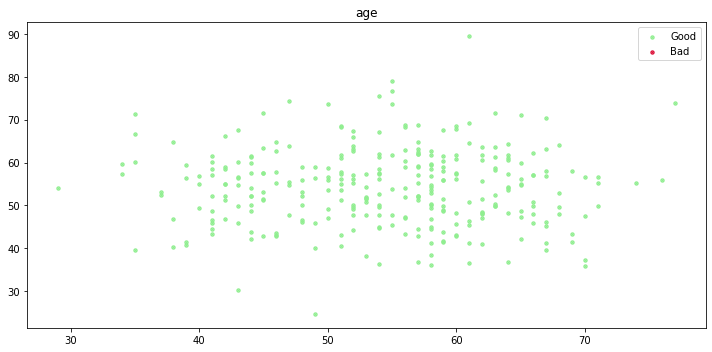

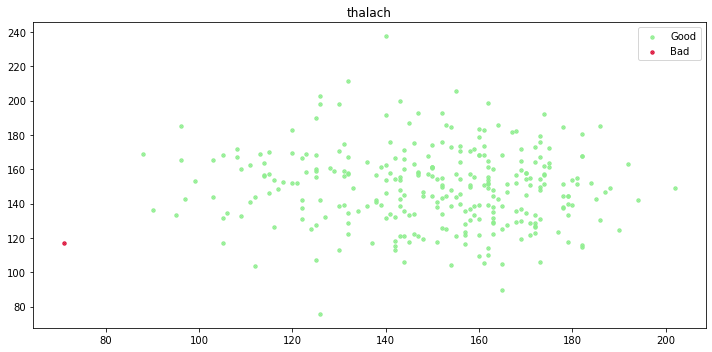

In [15]:
# use the non-categorical data and detect outliers.
heart_cp = heart_df.copy()

# tone down the large floats to readable format
pd.set_option('display.float_format', lambda x: '%.5f' % x)
print(heart_cp.describe())

precision = 3.35 # discard any sample with z score higher than 3 sigma

num_cols = list(set(heart_cp.columns[:-1]) - set(cat_cols))

count = 0
for col in num_cols:
    zscore_col = col + '_z_scr'
    heart_cp[zscore_col] = np.abs((heart_cp[col] - heart_cp[col].mean()) / heart_cp[col].std())
    good = heart_cp[zscore_col] < precision
    np.random.seed(42)
    normal_dist = np.random.normal(size=heart_cp.shape[0], loc=heart_cp[col].mean(), scale=heart_cp[col].std())
    fig, ax = plt.subplots(figsize=(10, 5))
    plt.title(col)
    ax.scatter(heart_cp.loc[good, col], normal_dist[good], s=2, label='Good', alpha=1, linewidths=3, color='lightgreen')
    ax.scatter(heart_cp.loc[~good, col], normal_dist[~good], s=2, label='Bad', alpha=1, linewidths=3, color='crimson')
    ax.legend()
    file_name = "scatter_" + col
    utils.save_fig(file_name)
    count += heart_cp[~good].shape[0]
    heart_cp.drop(heart_cp.loc[~good, :].index, inplace=True)
    del heart_cp[zscore_col]
    
print(f'Total No. of outliers found: {count}')

heart_cp.shape

In [16]:
heart_cp

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.30000,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.50000,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.40000,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.80000,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.60000,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.20000,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.20000,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.40000,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.20000,1,1,3,0


We plot a correlation matrix to see if there are any columns that have high +ve or -ve correlation with any other column. Luckily, there are no such columns with solid correlation (by solid we mean above 75%, usually).

Saving figure heatmap_corr


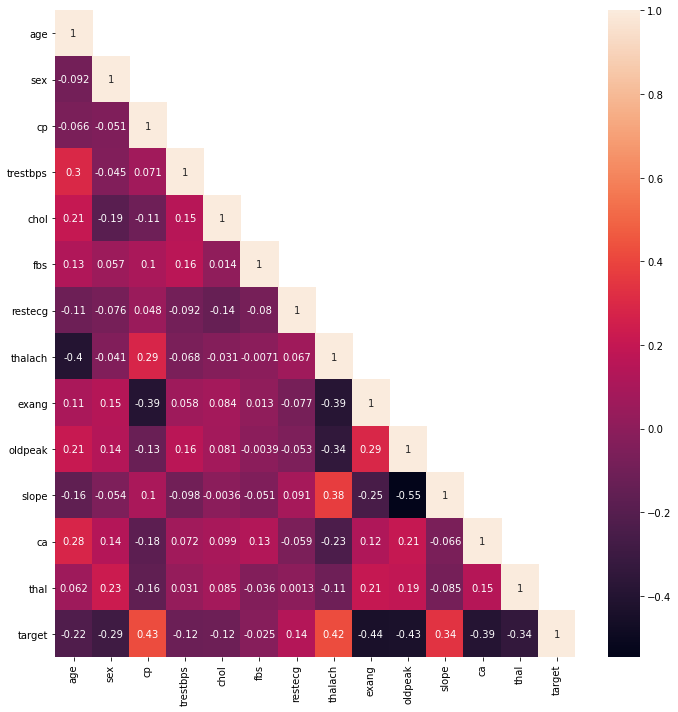

In [17]:
corr_mat = heart_cp.corr()
f, ax = plt.subplots(figsize=(10, 10))
mask = np.zeros_like(corr_mat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
mask[np.diag_indices_from(mask)] = False

sns.heatmap(corr_mat, annot=True, mask=mask, ax=ax);

utils.save_fig("heatmap_corr")

Finally, we create a pairwise scatter plot against all the numerical columns and distinguish the +ve samples (shown in orange) from the -ve samples (shown in blue).

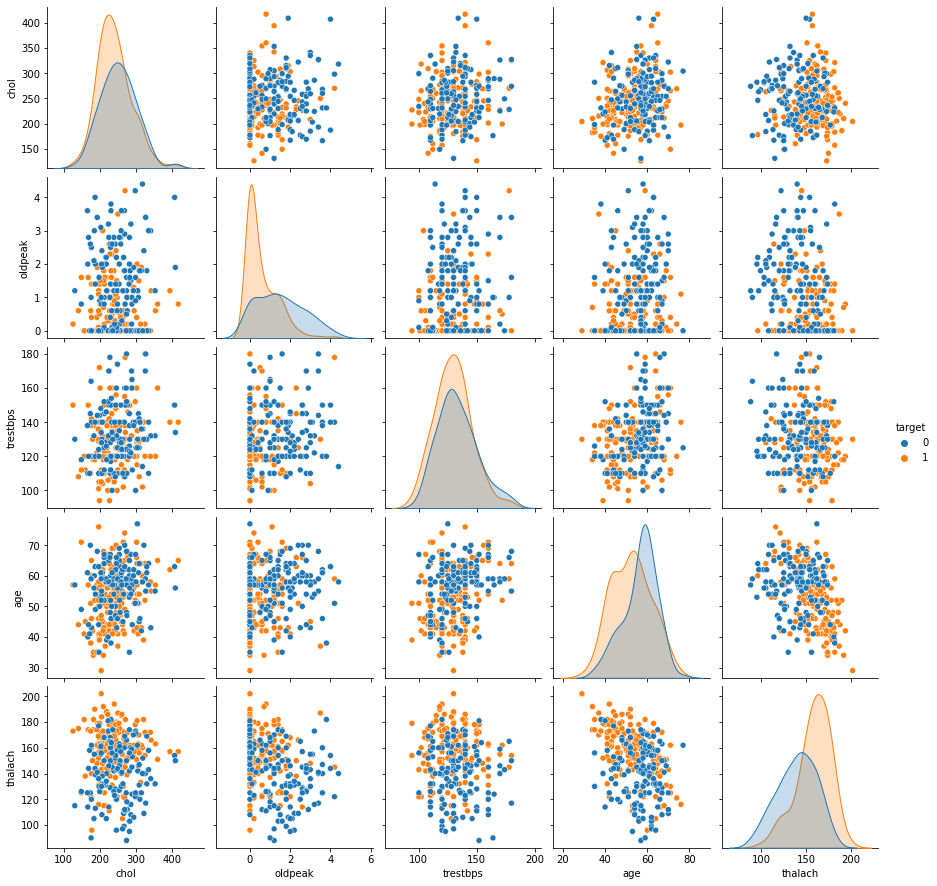

In [18]:
sns.pairplot(heart_cp, x_vars=num_cols, y_vars=num_cols, hue="target");

## 4. Splitting data into Training and Test set

Now our EDA and preprocessing phase is over. We can now split the data into training and test set. We are going for an 80-20 shuffled split. `stratify` is set to y so that the train and test splits approximately reflect the target distribution that was present in the original dataset.

In [19]:
from sklearn.model_selection import train_test_split

X = heart_cp.iloc[:, :-1]
y = heart_cp.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True, stratify=y 
)

X_train.shape, X_test.shape

((237, 13), (60, 13))

We now have to standardize the numerical columns and one-hot encode the categorical columns.
The categorical columns are one-hot encoded and the first column from the one-hot encode is dropped to avoid dummy variable trap.

We create a column transformer pipeline to do these two steps, separately on the training set and test set, so to avoid influencing training set with values from test set.

In [20]:
# column standardization

# we will standardize the numerical (non-categorical) columns for the train set


from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

col_normalizer = ColumnTransformer(
    [
        ('onehot', OneHotEncoder(drop='first'), cat_cols),
        ('scaler', StandardScaler(), num_cols)
    ],
    remainder="passthrough")


X_train = col_normalizer.fit_transform(X_train)
y_train = y_train.values

# transform the test set through similar pipeline before feeding into classification
X_test = col_normalizer.fit_transform(X_test)
y_test = y_test.values

we create two main dataframes `train_df` and `test_df` which stores every column, including the one hot encoded categorical columns and the `target`. This will serve as a reference.

In [21]:
col_list = []
col_list += col_normalizer.transformers_[0][1].get_feature_names(cat_cols).tolist()
col_list += num_cols
col_list.append("target")

# create a dataframe from the transformed data array for easier understanding
train_arr = np.concatenate([X_train, y_train.reshape(-1, 1)], axis=1)
train_df = pd.DataFrame(train_arr, columns=col_list)

test_arr = np.concatenate([X_test, y_test.reshape(-1, 1)], axis=1)
test_df = pd.DataFrame(test_arr, columns=col_list)

## 5. Principal Component Analysis

In this part, we perform Principle Component Analysis on the training data to find out a lower-dimensional projection of the dataset that retains most of the variance present.
 
We compute principal components for all 22 columns (by specifying `n_components=None`) and calculate the fraction of the total variance explained by each of them. 
We then compute a cumulative sum of the explained variance ratio to see how much variance is explained by 1, 2, ...., 22 principal components.

We plot the corresponding curve to see that in order to explain 95% of the total variance, we would need 13 principal components.

`n_components` required for 90%, 99%, 99.99% etc are described below.

From this, we get a set of `n_components` to test for our PCA analysis, which is `[11, 13, 18, 22]`

Saving figure pca_cumsum
To retain 40% of the variance explained, we should keep 2 components
To retain 50% of the variance explained, we should keep 3 components
To retain 90% of the variance explained, we should keep 11 components
To retain 95% of the variance explained, we should keep 13 components
To retain 99% of the variance explained, we should keep 18 components
To retain 99.99% of the variance explained, we should keep 22 components


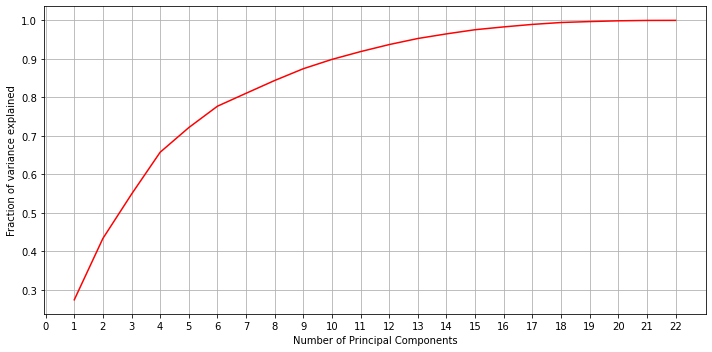

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

pca.fit(X_train)
pve = pca.explained_variance_ratio_
np.set_printoptions(suppress=True)

pve_cumsum = np.cumsum(pve[0:X_train.shape[1]])
num_eigens = np.arange(1, X_train.shape[1]+1, 1)
f, ax = plt.subplots(figsize=(10,5))
plt.plot(num_eigens, pve_cumsum, 'r-')
ax.set_facecolor('white')
plt.xticks(np.arange(0, X_train.shape[1]+1, 1))
plt.xlabel("Number of Principal Components")
plt.ylabel("Fraction of variance explained")
plt.grid(True)

utils.save_fig("pca_cumsum")

print(f'To retain 40% of the variance explained, we should keep {((~(pve_cumsum >= 0.40)).sum()) + 1} components')
print(f'To retain 50% of the variance explained, we should keep {((~(pve_cumsum >= 0.50)).sum()) + 1} components')
print(f'To retain 90% of the variance explained, we should keep {((~(pve_cumsum >= 0.90)).sum()) + 1} components')
print(f'To retain 95% of the variance explained, we should keep {((~(pve_cumsum >= 0.95)).sum()) + 1} components')
print(f'To retain 99% of the variance explained, we should keep {((~(pve_cumsum >= 0.99)).sum()) + 1} components')
print(f'To retain 99.99% of the variance explained, we should keep {((~(pve_cumsum >= 0.9999)).sum()) + 1} components')

## 6. Training the models 

We now train the models as per specification.
1. K-Nearest Neighbors 
2. K-Nearest Neighbors with PCA
3. Support Vector Machine
4. Support Vector Machine with PCA

### 6.1. K Nearest Neighbors

We first naively train a model on the default unclean dataset and check the accuracy. `n_neighbours` is the default value `5`

`heart_df` is the base dataframe and we will be using that.

In [23]:
# knn without onehot or standardization
from sklearn.neighbors import KNeighborsClassifier

X_def = heart_df.iloc[:, :-1].values
y_def = heart_df.iloc[:, -1].values
X_tr, X_ts, y_tr, y_ts = train_test_split(X_def, y_def, random_state=42, shuffle=True, test_size=0.2)

knn_base = KNeighborsClassifier()
knn_base.fit(X_tr, y_tr)

print(f'Train score for KNN on unclean dataset: {knn_base.score(X_tr, y_tr)}')
print(f'Test score for KNN on unclean dataset: {knn_base.score(X_ts, y_ts)}')

Train score for KNN on unclean dataset: 0.7603305785123967
Test score for KNN on unclean dataset: 0.6885245901639344


We now use the standardized and one-hot encoded training data, `X_train` in the KNN model.

Train accuracy for KNN: 0.869198312236287, F1 score: 0.8838951310861423
Test accuracy for KNN: 0.7333333333333333, F1 score: 0.7647058823529412
Saving figure confusion_KNN


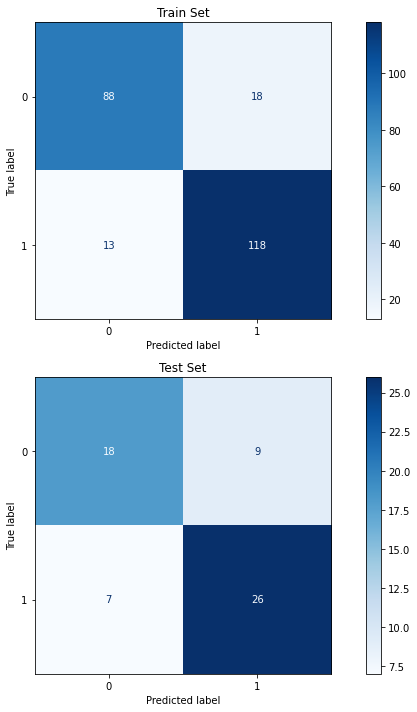

In [24]:
knn=KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
knn.fit(X_train, y_train)

utils.plot_accuracy(knn, X_train, X_test, y_train, y_test, "KNN")

utils.save_fig("confusion_KNN")

We make a copy of the main training dataframe `test_df` and extract only the numerical columns of it to make a new dataframe `train_knn`. This will serve for our purpose of showing the pairplots wrt the KNN models output. 

Saving figure pairplot_test_KNN


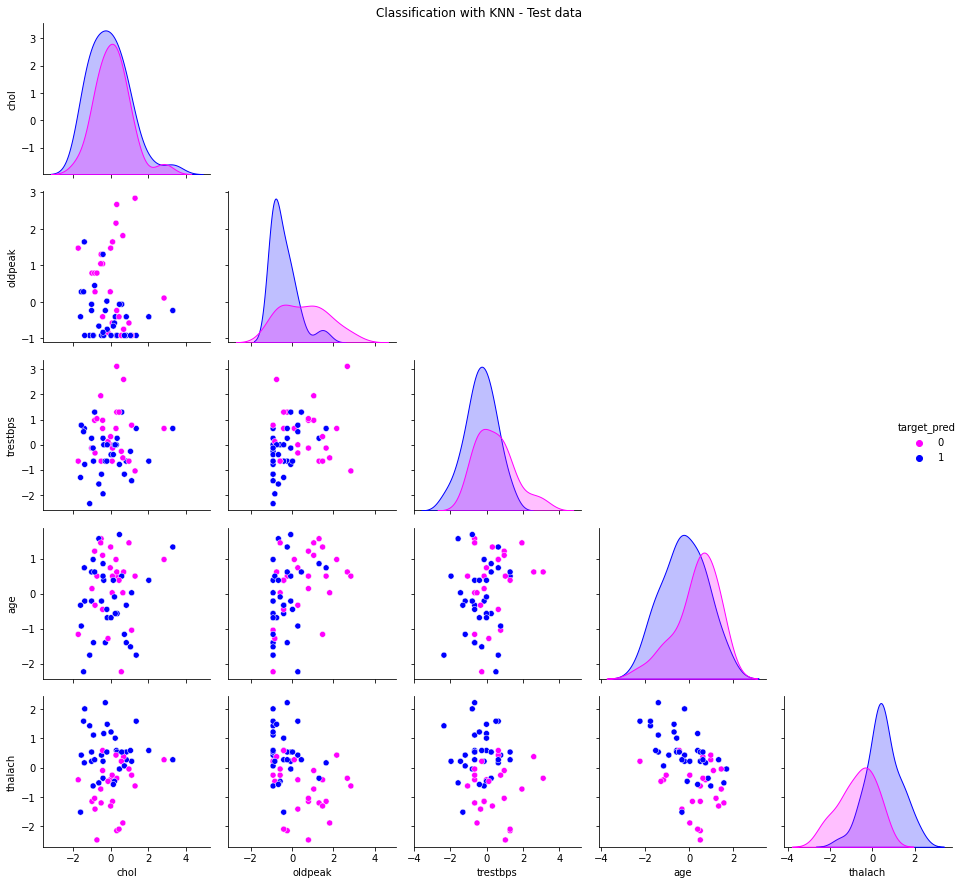

In [25]:
# pair plot of the test data using KNN classification results

utils.plot_all_pair(
    X=X_test[:, -5:], 
    y=knn.predict(X_test), 
    columns=num_cols,
    target="target_pred",
    lower=True,
    colormap=["magenta", "blue"],
    title="Classification with KNN - Test data"
)

utils.save_fig("pairplot_test_KNN")

### 6.2. K Nearest Neighbors with PCA

Here we create a lowe-dimensional representation of the data using PCA and then fit the same KNN model into it.

Train accuracy for KNN + PCA (2 dimensions): 0.7932489451476793, F1 score: 0.8122605363984674
Test accuracy for KNN + PCA (2 dimensions): 0.7333333333333333, F1 score: 0.7714285714285715
Saving figure confusion_KNN_PCA


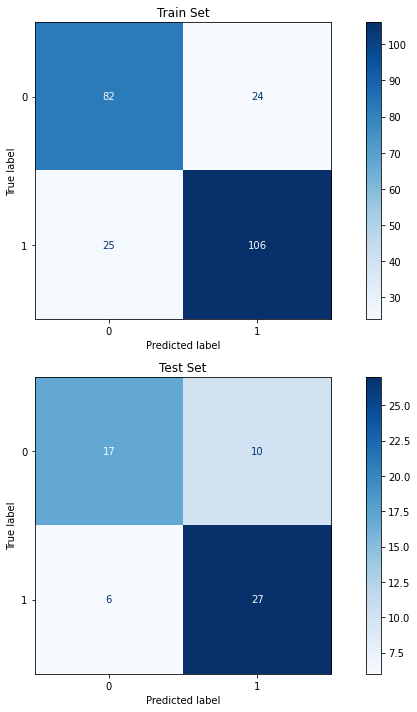

In [26]:
# KNN with PCA

# taking n_components = 2 since it retains above 40% of variance.
from sklearn.metrics import plot_confusion_matrix
pca = PCA(n_components=2)
pca.fit(X_train)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

knn_pca = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
knn_pca.fit(X_train_pca, y_train)

utils.plot_accuracy(knn_pca, X_train_pca, X_test_pca, y_train, y_test, "KNN + PCA (2 dimensions)")
utils.save_fig("confusion_KNN_PCA")

Saving figure pairplot_test_KNN_PCA


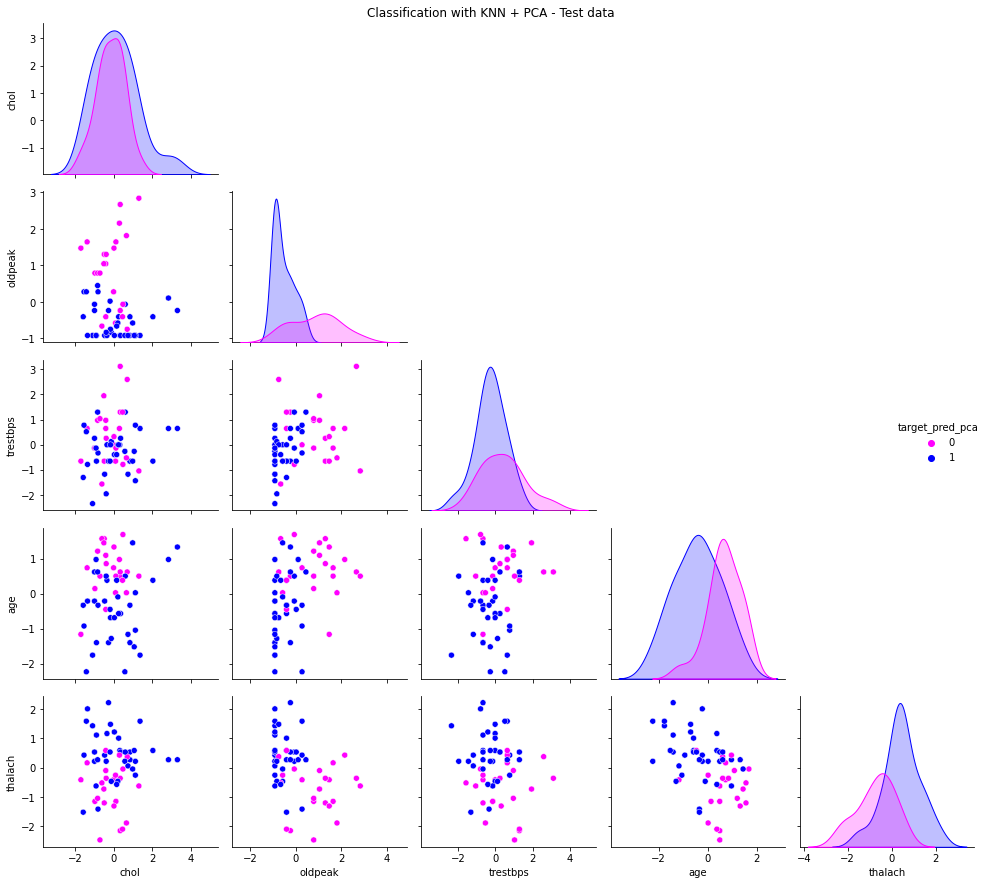

In [27]:
utils.plot_all_pair(
    X=X_test[:, -5:], 
    y=knn_pca.predict(X_test_pca), 
    columns=num_cols,
    target="target_pred_pca",
    lower=True,
    colormap=["magenta", "blue"],
    title="Classification with KNN + PCA - Test data"
)

utils.save_fig("pairplot_test_KNN_PCA")

As we can see, using 2 dimensions for PCA gave us clear distinction of samples and decent enough test accuracy. 

### 6.3. Support Vector Machine

Here we run Support Vector Machine with an RBF kernel first on the standardized and one-hot encoded dataset. We will use gridSearchCV to try out different hyperparameters for SVM, such as C.
We split the dataset into 10 different cross-validation dataset and perform all combinations of `kernel`, `C` and `gamma` hyperparameters on each of them and then pick the best performing set of hyperparameters.

In [28]:
# using SVM

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm = SVC()

grid_svm = GridSearchCV(
    svm,
    {
        'kernel': ('linear', 'rbf'),
        'C': [0.01, 0.1, 1, 5, 10, 50, 100],
        'gamma': [1e-05, 1e-04, 0.001, 0.01, 0.1],
    }, 
    cv=10
)

grid_svm.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'kernel': ('linear', 'rbf')})

In [29]:
print("Best parameters for SVM using GridSearch")
df = pd.DataFrame(grid_svm.best_params_, index=[0])
df

Best parameters for SVM using GridSearch


,C,gamma,kernel
0,10,0.00001,linear


Train accuracy for SVM_gridCV: 0.8776371308016878, F1 score: 0.8929889298892988
Test accuracy for SVM_gridCV: 0.8333333333333334, F1 score: 0.8571428571428571
Saving figure confusion_SVM


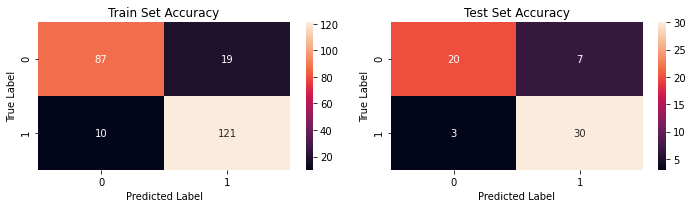

In [30]:
utils.plot_accuracy_sns(grid_svm, X_train, X_test, y_train, y_test, "SVM_gridCV")

utils.save_fig("confusion_SVM")

As we can see, we get a pretty decent accuracy with Support Vector Classifier with the chosen hyperparameters by the GridSearchCV.

### 6.4. Support Vector Machine with PCA

Now we similarly create another gridsearchCV where along with searching for best possible hyperparameters for SVM, it will also search for the `n_components` for our PCA that will give the best accuracy.

In [31]:
# first we create a pipeline to include pca and svm components into one single model object

from sklearn.pipeline import Pipeline


svm_pca_pipe = Pipeline([
    ('pca', PCA()),
    ('svm', SVC())
])

grid_svm_pca = GridSearchCV(
    svm_pca_pipe,
    {
        'pca__n_components': [2, 5, 11, 13, 18],
        'svm__kernel': ['linear', 'rbf'],
        'svm__C': [0.01, 0.1, 1, 5, 10, 50, 100],
        'svm__gamma': [1e-05, 1e-04, 0.001, 0.01, 0.1],
    }, cv=10
)


grid_svm_pca.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Pipeline(steps=[('pca', PCA()), ('svm', SVC())]),
             param_grid={'pca__n_components': [2, 5, 11, 13, 18],
                         'svm__C': [0.01, 0.1, 1, 5, 10, 50, 100],
                         'svm__gamma': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'svm__kernel': ['linear', 'rbf']})

In [32]:
print("Best parameters for SVM + PCA using GridSearch")
df = pd.DataFrame(grid_svm_pca.best_params_, index=[0])
df

Best parameters for SVM + PCA using GridSearch


,pca__n_components,svm__C,svm__gamma,svm__kernel
0,18,1,0.00001,linear


Train accuracy for SVM_gridCV_PCA: 0.8776371308016878, F1 score: 0.8929889298892988
Test accuracy for SVM_gridCV_PCA: 0.8166666666666667, F1 score: 0.8450704225352113
Saving figure confusion_SVM_PCA


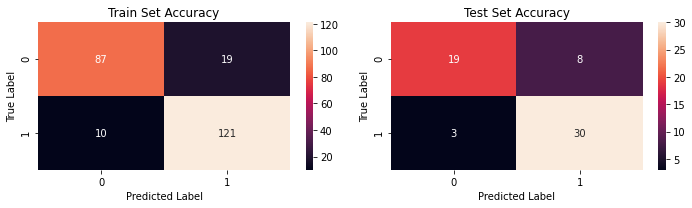

In [33]:
utils.plot_accuracy_sns(grid_svm_pca, X_train, X_test, y_train, y_test, "SVM_gridCV_PCA")

utils.save_fig("confusion_SVM_PCA")

Thus, we have obtained the best combinations of hyperparameters from the two grid searches. 

For **SVM** we have the following specs:
1. C = 10
2. gamma = 0.00001 or 1e-05
3. kernel = linear

For **SVM with PCA**, we have seen that `n_components = 18` gives us the best accuracy we cannot possibly plot a decision boundary on 18 dimensions.
Hence it contains the following specs:

1. n_components = 18
2. C = 1
3. gamma = 1e-05
4. kernel = linear

Therefore it is time to properly define all the models with their corresponding hyperparameters one last time

In [34]:
# final models

KNN = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)

KNN_PCA = Pipeline([
    ('pca', PCA(n_components=2)),
    ('knn', KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2))
])

SVM = SVC(C=10, gamma=1e-5, kernel="linear")

SVM_PCA = Pipeline([
    ('pca', PCA(n_components=18)),
    ('svm', SVC(C=1, gamma=1e-5, kernel="linear"))
])

### 6.5. Voting Classifier for all four models

Now that all the models are successfully presented and the parameters known, it is time to perform an ensemble voting classification to choose the best model while simultaneously train all the models.

In [35]:
from sklearn.ensemble import VotingClassifier


voting_clf = VotingClassifier(
    estimators=[
        ('knn', KNN),
        ('knn_pca', KNN_PCA),
        ('svm', SVM),
        ('svm_pca', SVM_PCA)
    ], voting='hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('knn_pca',
                              Pipeline(steps=[('pca', PCA(n_components=2)),
                                              ('knn',
                                               KNeighborsClassifier(n_neighbors=7))])),
                             ('svm', SVC(C=10, gamma=1e-05, kernel='linear')),
                             ('svm_pca',
                              Pipeline(steps=[('pca', PCA(n_components=18)),
                                              ('svm',
                                               SVC(C=1, gamma=1e-05,
                                                   kernel='linear'))]))])

In [36]:
def voting_indiv_score(vclf, X, y):
    print(f'knn score {vclf.estimators_[0].score(X, y)}')
    print(f'knn + pca score {vclf.estimators_[1].score(X, y)}')
    print(f'svm score {vclf.estimators_[2].score(X, y)}')
    print(f'svm + pca score {vclf.estimators_[3].score(X, y)}')

In [37]:
voting_indiv_score(voting_clf, X_test, y_test)

knn score 0.7333333333333333
knn + pca score 0.7333333333333333
svm score 0.8333333333333334
svm + pca score 0.8166666666666667


## 7. Decision Boundary

Here we plot the decision regions of each models. Since the base models are fitted on all 22 features, we cannot possibly visualize a decision boundary. The SVM model with PCA also has the best performance on PCA dimension = 18.

Therefore we cannot visualize them. But we can transform the 22 features into 2 dimensions using PCA and fit our original KNN and SVM models on this transformed data to get an idea of how efficient the models are.
This is also due to the fact that `mlxtend.plotting.plot_decision_regions` expects X to be 2 dimensional array.

Hence we redefine our original KNN and SVM models and fit them on transformed 2-dimensional dataset.

**Although the models in `voting_clf` classifier are different from this, they are for generating predictions and not for visualizations.**


Saving figure decision_bound_train


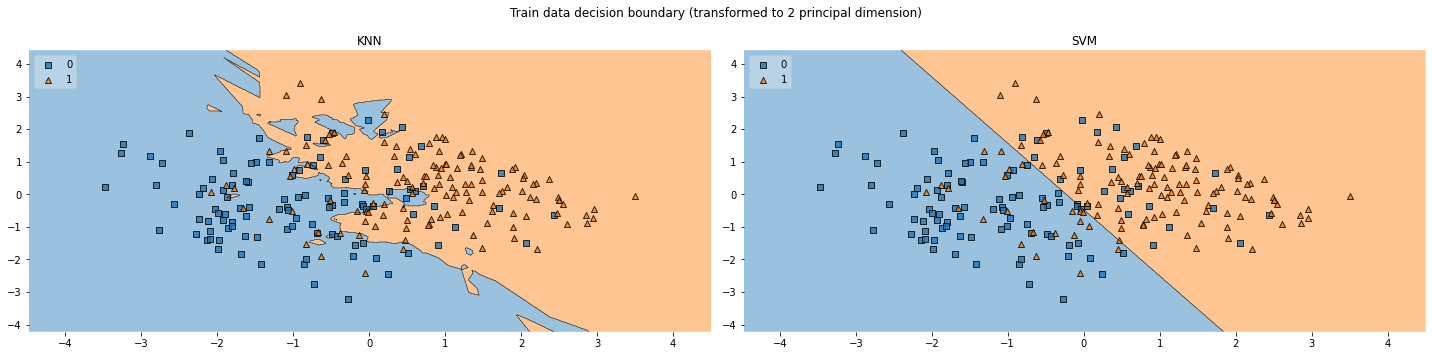

In [38]:
# decision boundary for KNN and SVM models with PCA dimension = 2

from matplotlib import gridspec
import itertools
gs = gridspec.GridSpec(1, 2);
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components=2)
X_tr = pca.fit_transform(X_train)

knn = KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2)
svm = SVC(C=10, gamma=1e-5, kernel="linear")

fig = plt.figure(figsize=(20, 5))
fig.suptitle("Train data decision boundary (transformed to 2 principal dimension)")


labels = ['KNN', 'SVM']
for clf, lab, grd in zip([knn, svm],
                         labels,
                         itertools.product([0, 1], repeat=2)):
    
    clf.fit(X_tr, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_tr, y=y_train, clf=clf, legend=2)
    plt.title(lab)


utils.save_fig("decision_bound_train")

Saving figure decision_bound_test


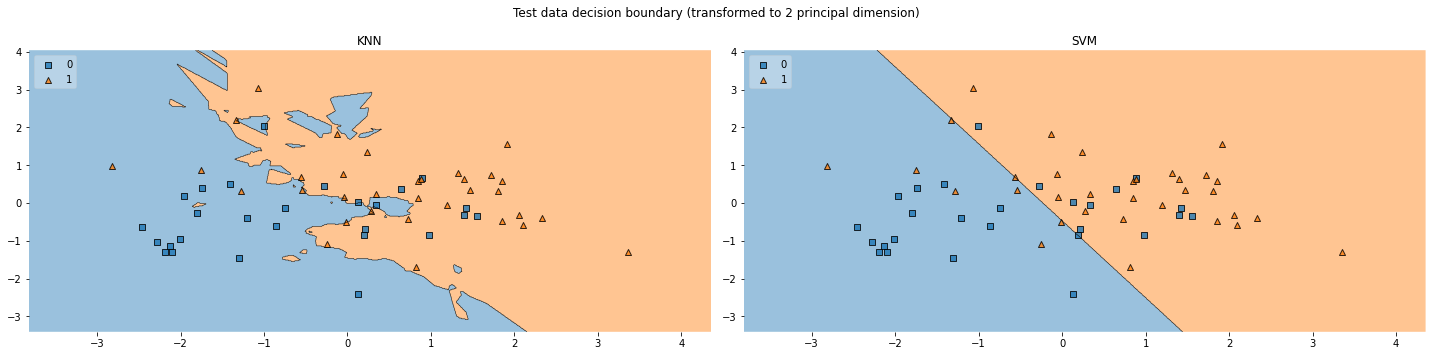

In [39]:
# The same models performed on the test data. We do not refit the models anymore.

gs = gridspec.GridSpec(1, 2);

fig = plt.figure(figsize=(20, 5))
fig.suptitle("Test data decision boundary (transformed to 2 principal dimension)")
X_ts = pca.transform(X_test)


for clf, lab, grd in zip([knn, svm],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_ts, y=y_test, clf=clf, legend=2)
    plt.title(lab)

utils.save_fig("decision_bound_test")

## 8. Conclusion and Inference

As we can see, SVM on the standardized and one-hot encoded dataset is the best performing model among all. PCA with 2 components on KNN perform similarly as KNN without PCA. While SVM with PCA and `n_components = 18` (chosen by the grid search cross-validation) performs worse than the default SVM due to some variance being lost by the decomposition.

Since we have used a Voting classifier model that ensembles all the four models, we can simply use the voting classifier model to predict further test samples in the future since it will always predict according to the model that has the best accuracy.